# Statistics between Algorithms for computing the Temporal Centrality :

#### - In this notebook are compared the Top K Results through the Kendall Rank (Oettershagen 2022) 
#### - and some basic statistics in the approximation algorithms such as (ONBRA) and (TWC)

## 1- Install Requirements


In [1]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2- Import Libraries, Download the Results' Folder from a public Drive Folder and Unzip it:

In [4]:
# Import required libraries
# Statistic 
from scipy.stats import kendalltau
# Plotting and Data Manipulation
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
# Access to the Data from file
import gdown
import glob
# Download the folder in order to access at the Outcomes .txt for each algorithm
# modify the url
# https://drive.google.com/uc?id=1wtaxfz_y_1CZhQxae3Bbc3FPgML9P9KO&export=download
url = 'https://drive.google.com/uc?id=1wtaxfz_y_1CZhQxae3Bbc3FPgML9P9KO&export=download' # 'https://drive.google.com/uc?id=10RlE5wC4Nr_X2RA3InNuN-5374_7N63o&export=download'
output = 'folder.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wtaxfz_y_1CZhQxae3Bbc3FPgML9P9KO&export=download
To: /content/folder.zip
100%|██████████| 53.6k/53.6k [00:00<00:00, 26.1MB/s]


'folder.zip'

In [5]:

# unzip the folder
!unzip folder.zip

Archive:  folder.zip
replace CollegeMsg/01.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CollegeMsg/01.txt       
  inflating: CollegeMsg/02.txt       
  inflating: CollegeMsg/03.txt       
  inflating: CollegeMsg/04.txt       
  inflating: CollegeMsg/05.txt       
  inflating: email-Eu-core-temporal/01.txt  
  inflating: email-Eu-core-temporal/02.txt  
  inflating: facebook-wall/01.txt    
  inflating: facebook-wall/02.txt    
   creating: insect/
  inflating: insect/01.txt           
  inflating: insect/02.txt           
  inflating: insect/03.txt           
   creating: reptilia/
  inflating: reptilia/01.txt         
  inflating: reptilia/02.txt         
  inflating: reptilia/03.txt         
  inflating: reptilia/04.txt         
  inflating: reptilia/05.txt         
  inflating: sd01/01.txt             
  inflating: sd01/02.txt             
  inflating: sx-askubuntu/01.txt     
  inflating: sx-askubuntu/02.txt     
  inflating: sx-mathoverflow/01.txt  
  inflating: sx-ma

## 3- General Statistics :
- Kendall Rank
- Mean Relative Error (only for Approximation Algorithm : TWC and ONBRA)
- Maximum Deviation (only for Approximation Algorithm : TWC and ONBRA)

In [7]:
# Statistic 
from scipy.stats import kendalltau
# Plotting and Data Manipulation
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
# Statistics
from sklearn.metrics import mean_absolute_error as mae

In [8]:
# read the file and return a list of Centralities
def read(name_file):
    centralities = []
    # opening the text file
    with open(name_file,'r') as file:
        for line in file:
            i = 0
            for word in line.split():
                # Pick only the centrality
                if i != 0:
                    centralities.append(float(word))
                i = i + 1
    return list(set(centralities))

In [17]:
def Kendallplot(rank_array,name_folder, n_algorithm):
    if n_algorithm == 5:
        # Draw the Kendall Rank Matrix
        df_cm = pd.DataFrame(rank_array,index=["ONBRA", "TWC", "TBC", "TBCDG","TNCCN"], columns=["ONBRA", "TWC", "TBC", "TBCDG","TNCCN"])
    if n_algorithm == 2:
        # Draw the Kendall Rank Matrix
        df_cm = pd.DataFrame(rank_array,index=["ONBRA", "TWC"], columns=["ONBRA", "TWC"])
    if n_algorithm == 3:
        # Draw the Kendall Rank Matrix
        df_cm = pd.DataFrame(rank_array,index=["ONBRA", "TWC","TBC"], columns=["ONBRA", "TWC","TBC"])
    # Set the Label Size
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4)
    # Set the Font Size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.title(name_folder)
    # Plot the Kendall Rank Matrix found
    plt.show()

In [10]:
def maxDev(exact,actual):
    # Compute the average of the exact Centralities
    avg = sum(exact, 0.0) / len(exact)
    # Compute the Maximum Deviation between the actual value and the exact one
    max_dev = max(abs(actual_v - avg) for actual_v in actual)
    return max_dev

In [11]:
def computeKenDataset(name_folder):
    # Retrieve the list of Centralities of all the Algorithms
    '''centralities = [[1, 2, 3, 4, 5],
                   [1, 3, 6, 2, 7],
                   [4, 7, 2, 9, 0],
                   [54, 22, 4, 19, 4],
                   [11, 34, 87, 9, 2]]'''
    centralities = []
    centrality = []
    ranks = []
    for result in glob.glob('*.txt'):
        centrality = read(result)
        if len(centrality) < 10:
            while len(centrality) != 10:
                centrality.append(0)
        centralities.append(centrality)
    # Compute the Kendall Rank for each combination of algorithm
    print(centralities)
    if len(centralities) != 1:
        for c1 in centralities:
            for c2 in centralities:
                corr, _ = kendalltau(c1, c2)
                #print("Kendall Rank Correlation found : "+str(corr))
                ranks.append(corr)
                #print("Ranks : "+str(len(ranks)))
        # Reshape the list to a matrix (5,5)
        rank_array = np.array(ranks)
        rank_array = np.reshape(ranks, (len(centralities),len(centralities)))
        # Plot Kendall
        Kendallplot(rank_array,name_folder, len(centralities))
    if len(centralities) >= 2:
        if len(centralities) >= 3:
            # calculate MAE for ONBRA
            error_o = mae(centralities[2], centralities[0])
            # Compute the Maximum Deviation for ONBRA with the respect to TBC
            max_dev_o = maxDev(centralities[2],centralities[0])
            print("-----------------")
            print("Mean Absolute Error between TBC(Exact Algorithm) and ONBRA(Approximated Algorithm) : "+str(error_o))
            print("Maximum Deviation for ONBRA with the respect to TBC : "+str(max_dev_o))
            # calculate MAE for TWC
            error_t = mae(centralities[2], centralities[1])
            # Compute the Maximum Deviation for TWC with the respect to TBC
            max_dev_t = maxDev(centralities[2],centralities[1])
            print("-----------------")
            print("Mean Absolute Error between TBC(Exact Algorithm) and TWC(Approximated Algorithm) : "+str(error_t))
            print("Maximum Deviation for TWC with the respect to TBC : "+str(max_dev_t))
        if len(centralities) == 2:
            # calculate MAE for ONBRA
            error_o = mae(centralities[1], centralities[0])
            # Compute the Maximum Deviation for TWC with the respect to ONBRA
            max_dev_o = maxDev(centralities[1],centralities[0])
            print("-----------------")
            print("Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : "+str(error_o))
            print("Maximum Deviation for TWC with the respect to ONBRA : "+str(max_dev_o))

## 4- Do the Computation for all the Datasets

[[0.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0], [215905.0, 68481.6, 300291.0, 72553.4, 137421.0, 121775.0, 139760.0, 97680.8, 57207.9, 70268.8], [33.3042, 34.287, 14.746, 16.567, 16.0637, 19.0474, 20.3025, 21.0346, 21.8316, 20.2046], [736.0, 292.0, 100.0, 76.0, 80.0, 113.0, 119.0, 184.0, 90.0, 94.0], [538595.0, 33764.4, 173541.0, 38824.5, 34601.3, 47155.7, 44213.1, 35997.8, 55547.7, 90141.4]]


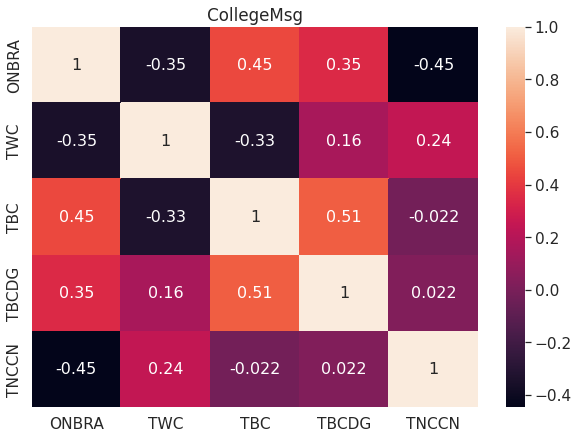

-----------------
Mean Absolute Error between TBC(Exact Algorithm) and ONBRA(Approximated Algorithm) : 21.63886
Maximum Deviation for ONBRA with the respect to TBC : 21.738860000000003
-----------------
Mean Absolute Error between TBC(Exact Algorithm) and TWC(Approximated Algorithm) : 128112.71114
Maximum Deviation for TWC with the respect to TBC : 300269.26114


In [ ]:
# CollegeMsg
#!pwd
#%cd "CollegeMsg"
computeKenDataset("CollegeMsg")

/content
/content/email-Eu-core-temporal
[[35913800.0, 9103260.0, 12137900.0, 26146800.0, 20413300.0, 20255700.0, 55559000.0, 20186300.0, 12213400.0, 18185400.0], [97.3816, 67.6674, 68.6347, 68.263, 102.071, 67.0708, 74.0671, 77.2361, 206.51, 81.0717]]


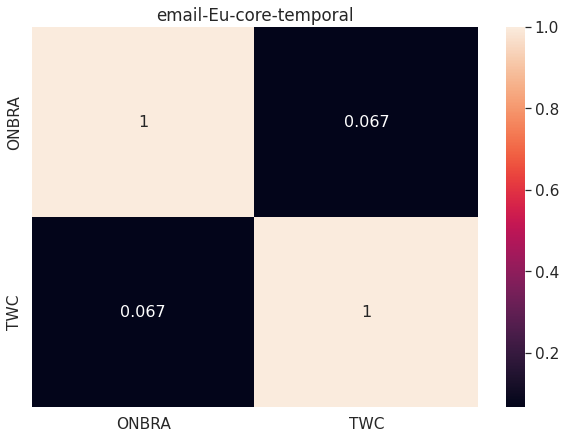

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 23011395.00266
Maximum Deviation for TWC with the respect to ONBRA : 55558909.00266


In [ ]:
# email-Eu-core-temporal
%cd ..
%cd "email-Eu-core-temporal"
computeKenDataset("email-Eu-core-temporal")

/content
/content/facebook-wall
[[967426.0, 1028740.0, 826182.0, 693356.0, 678348.0, 531887.0, 1297300.0, 1579510.0, 670811.0, 825758.0], [6.90609, 7.44444, 8.45585, 8.43888, 10.6651, 11.9325, 7.3694, 7.23242, 14.483, 7.0188]]


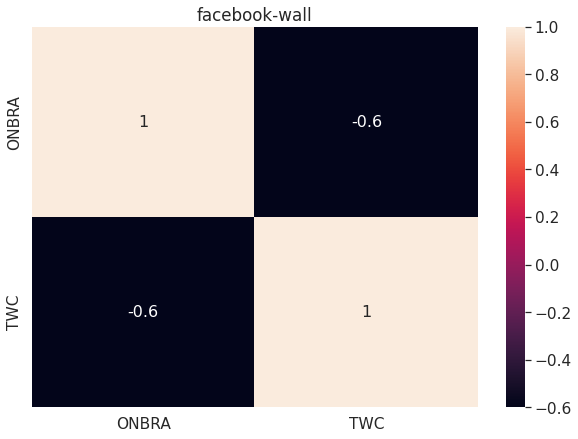

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 909922.8053519999
Maximum Deviation for TWC with the respect to ONBRA : 1579501.005352


In [ ]:
# facebook-wall
%cd ..
%cd "facebook-wall"
computeKenDataset("facebook-wall")

/content
/content/sd01
[[19385600.0, 673552000.0, 1468130.0, 3393540.0, 673810000.0, 1669520.0, 19104500.0, 1504630.0, 1712410.0, 3270780.0], [1.9718, 2.0, 2.11014, 3.28941, 2.04585, 1.95299, 1.77488, 1.71429, 1.57143, 1.28632]]


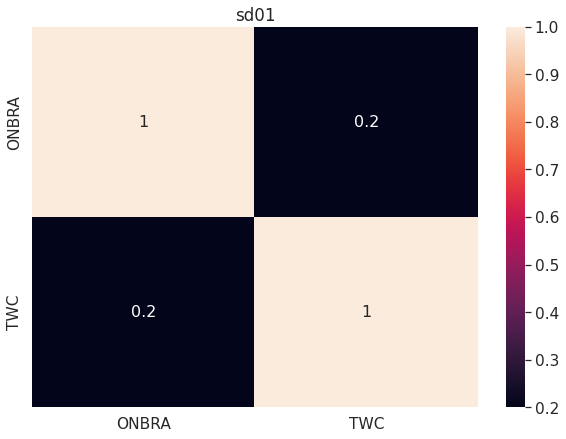

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 139887109.02828902
Maximum Deviation for TWC with the respect to ONBRA : 673809998.028289


In [ ]:
# sd01
%cd ..
%cd "sd01"
computeKenDataset("sd01")

/content
/content/sx-askubuntu
[[42605600.0, 15570400.0, 27883000.0, 18322600.0, 15873800.0, 50535000.0, 31761100.0, 67766000.0, 21251700.0, 49119800.0], [34.4999, 37.8216, 49.8908, 19.3837, 21.5913, 22.9024, 23.9302, 24.0626, 22.2936, 28.8977]]


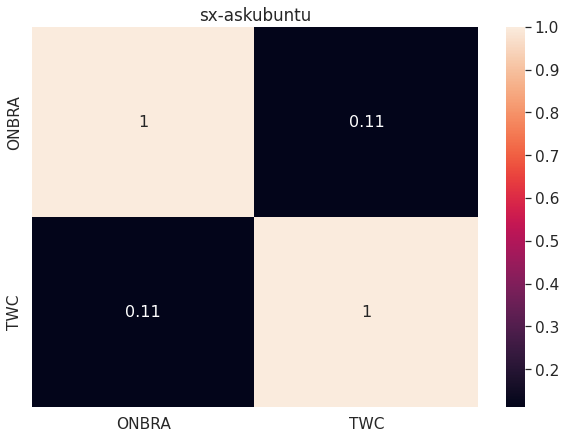

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 34068871.472619995
Maximum Deviation for TWC with the respect to ONBRA : 67765971.47262


In [ ]:
# sx-askubuntu
%cd ..
%cd "sx-askubuntu"
computeKenDataset("sx-askubuntu")

/content
/content/sx-mathoverflow
[[6911460.0, 24929800.0, 6360840.0, 11476300.0, 7793710.0, 5423150.0, 87412500.0, 6505940.0, 21866200.0, 20886300.0], [32.2247, 38.6332, 39.8129, 38.538, 44.4684, 78.0062, 83.5745, 22.1677, 61.2213, 30.0706]]


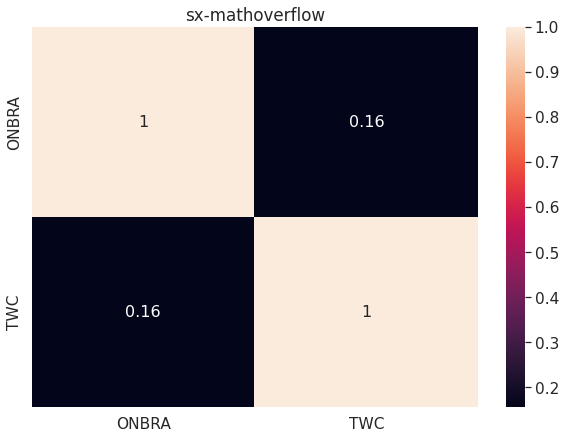

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 19956573.12825
Maximum Deviation for TWC with the respect to ONBRA : 87412453.12825


In [ ]:
# sx-mathoverflow
%cd ..
%cd "sx-mathoverflow"
computeKenDataset("sx-mathoverflow")

In [ ]:
# sx-stackoverflow
%cd ..
%cd "sx-stackoverflow"
computeKenDataset("sx-stackoverflow")

/content
/content/sx-stackoverflow
[[2.32861e+20, 9.21092e+22, 2.44908e+20, 1.767e+20, 1.81331e+20, 5.52267e+20, 1.22382e+21, 2.73691e+20, 2.12975e+20, 1.06471e+23]]


/content
/content/sx-superuser
[[25096800.0, 39640900.0, 56709800.0, 64857000.0, 36301000.0, 26010600.0, 971590000.0, 54099600.0, 73721300.0, 47602100.0], [35.4478, 37.0214, 38.3338, 72.2792, 72.2896, 77.5547, 77.923, 85.1313, 55.5993, 58.0903]]


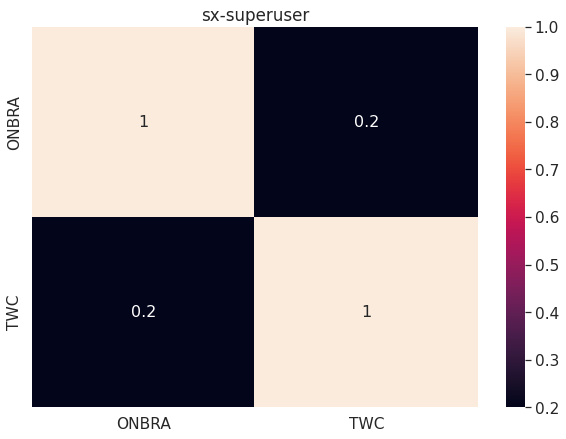

-----------------
Mean Absolute Error between TWC(Approximated Algorithm) and ONBRA(Approximated Algorithm) : 139562849.03296
Maximum Deviation for TWC with the respect to ONBRA : 971589939.03296


In [ ]:
# sx-superuser
%cd ..
%cd "sx-superuser"
computeKenDataset("sx-superuser")

In [ ]:
# wiki-talk-temporal
%cd ..
%cd "wiki-talk-temporal"
computeKenDataset("wiki-talk-temporal")

/content
/content/wiki-talk-temporal
[[2.00149e+18, 3.30653e+18, 1.9653e+18, 1.26745e+18, 9.20077e+17, 1.30545e+19, 2.84197e+22, 1.39681e+19, 9.00476e+17, 3.21261e+19]]


/content
/content/reptilia
[[0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0, 1.0, 2.0, 0, 0, 0, 0, 0, 0, 0], [0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.0, 1.0, -0.770833, -0.753086, -0.5, -2.32, -2.66667, -1.0, -1.86111, 0], [0.0, 4.0, 0, 0, 0, 0, 0, 0, 0, 0]]


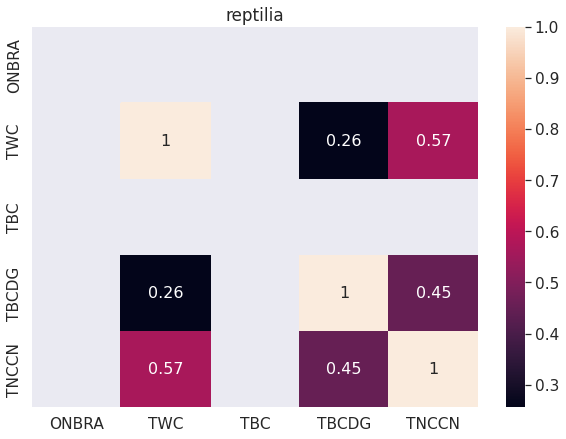

-----------------
Mean Absolute Error between TBC(Exact Algorithm) and ONBRA(Approximated Algorithm) : 0.0
Maximum Deviation for ONBRA with the respect to TBC : 0.0
-----------------
Mean Absolute Error between TBC(Exact Algorithm) and TWC(Approximated Algorithm) : 0.3
Maximum Deviation for TWC with the respect to TBC : 2.0


In [20]:
# reptilia
%cd ..
%cd "reptilia"
computeKenDataset("reptilia")

/content
/content/insect
[[0.5, 1.0, 2.0, 0.0, 0, 0, 0, 0, 0, 0], [34.1002, 67.3979, 68.2918, 35.1553, 39.1714, 75.3007, 43.1704, 78.2646, 82.3437, 53.2144], [-0.976562, -0.977349, -5.89571, -3.5, -11.8976, -9.78491, -6.88765, -5.89183, -3.92495, -1.96899]]


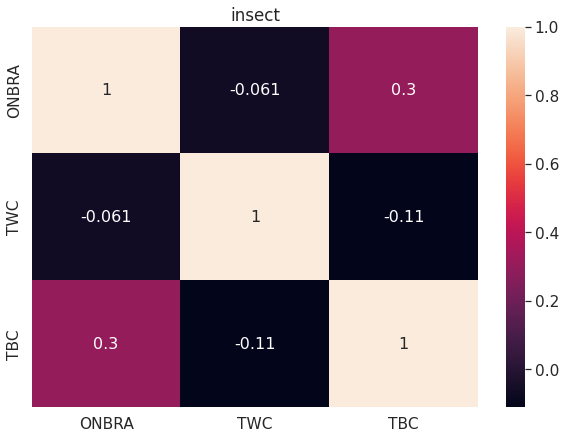

-----------------
Mean Absolute Error between TBC(Exact Algorithm) and ONBRA(Approximated Algorithm) : 5.5205551
Maximum Deviation for ONBRA with the respect to TBC : 7.1705551000000005
-----------------
Mean Absolute Error between TBC(Exact Algorithm) and TWC(Approximated Algorithm) : 62.81159510000001
Maximum Deviation for TWC with the respect to TBC : 87.5142551


In [18]:
# insect
%cd ..
%cd "insect"
computeKenDataset("insect")